[1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0, 13.5, 15.0]


/tmp/ipykernel_764650/1980730936.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
/tmp/ipykernel_764650/1980730936.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)


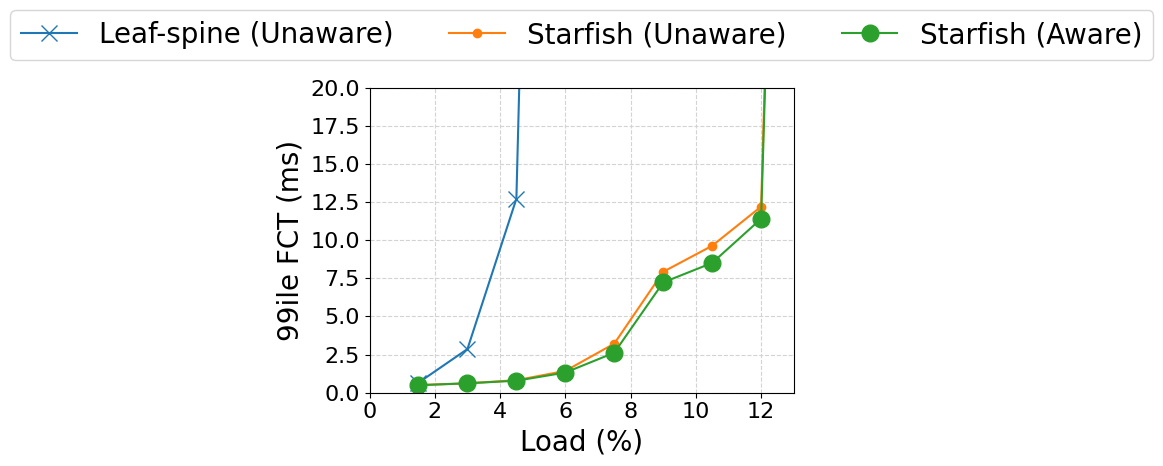

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

homedir = "/home/annzhou"
leafspinemultlistarr = [[0,69,320],[0,69,160],[0,207,320],[0,69,80]]
dringmultlistarr = [[0,69,320],[0,69,160],[0,207,320],[0,69,80],[1,5,64],[1,47,160],[1,163,320],[1,29,40],[1,301,320],[2,5,32]]
leafspinemultnamearr = [1.5,3,4.5,6]
dringmultnamearr = [x/10.0 for x in range(15,15*len(dringmultlistarr)+1,15)]
print(dringmultnamearr)
fseedarr = range(5)

fig, ax = plt.subplots(figsize=(9,5))

xlist = list()
ylist_over_mult = list()
for imultlist,multlist in enumerate(leafspinemultlistarr):
    mult = multlist[0]
    numerator = multlist[1]
    denominator = multlist[2]
    multname = leafspinemultnamearr[imultlist]

    # xlist.append(mult + numerator/denominator)
    xlist.append(multname)

    multname = f"{mult}_{numerator}_{denominator}"
    sumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/linkfailure2/{multname}.txt"
    with open(sumfile,'r') as f:
        lines = f.readlines()
        fct_over_fseed = list()
        for fseed in fseedarr:
            logfile = f"m_linkfailure2_leafspine_ecmp_equal_{fseed}_0_{multname}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    fct_over_fseed.append(n99fct)
        ylist_over_mult.append(fct_over_fseed)
# plt.errorbar(xlist,[sum(l)/len(l) for l in ylist_over_mult],yerr=[[min(l) for l in ylist_over_mult],[max(l) for l in ylist_over_mult]],label="leafspine",marker='x')
plt.plot(xlist,[sum(l)/len(l) for l in ylist_over_mult],label="Leaf-spine (Unaware)",marker='x',markersize=12)

xlist = list()
ylist_over_mult = list()
for imultlist,multlist in enumerate(dringmultlistarr):
    mult = multlist[0]
    numerator = multlist[1]
    denominator = multlist[2]
    multname = dringmultnamearr[imultlist]

    # xlist.append(mult + numerator/denominator)
    xlist.append(multname)

    multname = f"{mult}_{numerator}_{denominator}"
    sumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/linkfailure2/{multname}.txt"
    with open(sumfile,'r') as f:
        lines = f.readlines()
        fct_over_fseed = list()
        for fseed in fseedarr:
            logfile = f"m_linkfailure2_dring_32disjoint_thisweight_{fseed}_0_{multname}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    fct_over_fseed.append(n99fct)
        ylist_over_mult.append(fct_over_fseed)
# plt.errorbar(xlist,[sum(l)/len(l) for l in ylist_over_mult],yerr=[[min(l) for l in ylist_over_mult],[max(l) for l in ylist_over_mult]],label="dring,blind",marker='.')
plt.errorbar(xlist,[sum(l)/len(l) for l in ylist_over_mult],label="Starfish (Unaware)",marker='.',markersize=12)

xlist = list()
ylist_over_mult = list()
for imultlist,multlist in enumerate(dringmultlistarr):
    mult = multlist[0]
    numerator = multlist[1]
    denominator = multlist[2]
    multname = dringmultnamearr[imultlist]

    # xlist.append(mult + numerator/denominator)
    xlist.append(multname)

    multname = f"{mult}_{numerator}_{denominator}"
    sumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/linkfailure2/{multname}.txt"
    with open(sumfile,'r') as f:
        lines = f.readlines()
        fct_over_fseed = list()
        for fseed in fseedarr:
            logfile = f"m_linkfailure2_dring_32disjoint_thisweight_{fseed}_{fseed}_{multname}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    fct_over_fseed.append(n99fct)
        ylist_over_mult.append(fct_over_fseed)
# plt.errorbar(xlist,[sum(l)/len(l) for l in ylist_over_mult],yerr=[[min(l) for l in ylist_over_mult],[max(l) for l in ylist_over_mult]],label="dring,aware",marker='o')
plt.errorbar(xlist,[sum(l)/len(l) for l in ylist_over_mult],label="Starfish (Aware)",marker='o',markersize=12)

plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.3), fontsize=20)
plt.xlabel('Load (%)',fontsize=20)
plt.ylabel('99ile FCT (ms)',fontsize=20)
# plt.title('64to4, 1% links failed, 5 runs')   
plt.ylim(0,20)
plt.xlim(0,13)
plt.grid(color='lightgrey', linestyle='dashed', axis="both")    
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
plt.tight_layout()
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_failure_link.pdf", dpi=600, bbox_inches='tight')
plt.show()